# Grade & House Pricing

In [1]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
import statsmodels.api as sm
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from scipy import stats
import math
from PIL import Image

In [2]:
#Read dataset
df = pd.read_csv("kc_house_data.csv")


In [3]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
#strip description from grade category to just leave numerical grade
df['grade'] = df['grade'].str.partition(" ")

In [5]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [6]:
#checking if there are any nans in grade
df['grade'].isna().sum()

0

In [7]:
#make dummy categories for grade
df=pd.get_dummies(df, columns=['grade'], drop_first=True)

In [8]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11,grade_12,grade_13,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0,0,0,0,0,0,0,0,1,0


In [18]:
#Set up train and test groups
dummy_grades = ['grade_11', 'grade_12', 'grade_13', 'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9']


X = df[dummy_grades]
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y,  random_state=42)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5400 16197 5400


In [20]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# fit the model on the training set
lr.fit(X_train, y_train)

# Check the R^2 of the training data
lr.score(X_train, y_train)

0.5257896973506078

In [22]:
# Check the R^2 of the training data
lr.score(X_test, y_test)

0.5021755258904408

In [26]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)


In [30]:
# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [24]:
# get metrics of training set

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_hat_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_hat_train))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, y_hat_train)))

Mean Absolute Error: 164123.3840747235
Mean Squared Error: 63639112626.93466
Root Mean Squared Error: 252267.93816681235


In [13]:
# get metrics of test set
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat_test)))

Mean Absolute Error: 164516.25470526767
Mean Squared Error: 68301373727.39907
Root Mean Squared Error: 261345.3151051288


Before we dive into modeling, let's check that the variable "grades" meets assumptions of linear regression.

<AxesSubplot:xlabel='grade', ylabel='price'>

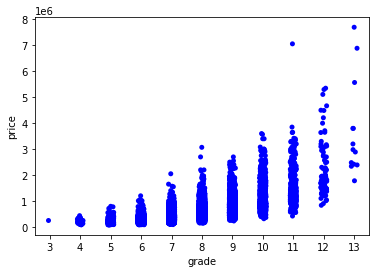

In [123]:
#1.) The relationship between the target and predictor is linear

sns.stripplot(data=df, x="grade", y="price", order = ['3','4','5','6','7','8','9','10','11','12','13'], color="blue")

Great! That looks pretty linear. Next, let's check that the errors are independent.

In [124]:
#check Durbin Watson statistic
from statsmodels.formula.api import ols
model = ols('price ~ grade', data=df).fit()

from statsmodels.stats.stattools import durbin_watson

#perform Durbin-Watson test
durbin_watson(model.resid)

1.9816852614143372

Wonderful! We got a Durbin Watson statistic of 1.98. A number between 1.5 - 2.5 means there is not a correlation between the residuals.

Next, we'll check to see if the errors are normally distributed.

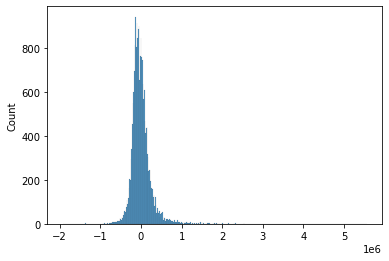

In [125]:
#make a historgram of the residuals
residuals=model.resid
sns.histplot(residuals);

This is a somewhat symmetric bell-shaped histogram that is rather evenly distributed around zero, indicating that the normality assumption is likely to be true. Finally, let's make sure the errors are homoskedastic (have the same variance).

In [146]:
from statsmodels.stats.diagnostic import het_white
white_test = het_white(model.resid, model.model.exog)

labels = ["LM_Statistic", "LM_Test p-value", "F_Statistic", "F_Test p-value"]
print(dict(zip(labels, white_test)))

{'LM_Statistic': 2647.3905905014876, 'LM_Test p-value': 0.0, 'F_Statistic': 301.5712464127113, 'F_Test p-value': 0.0}


In [151]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(model.resid, model.model.exog)
print(name, test)

['F statistic', 'p-value'] (0.9108627358440847, 0.9999993751526617, 'increasing')


In [53]:
df['grade'].value_counts()

7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: grade, dtype: int64

In [18]:
#make dummy categories for grade
df=pd.get_dummies(df, columns=['grade'],drop_first=True)

In [19]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,0,0,0,0,0,0,0,0,1,0


In [97]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     2338.
Date:                Tue, 04 Jan 2022   Prob (F-statistic):               0.00
Time:                        23:01:55   Log-Likelihood:            -2.9947e+05
No. Observations:               21597   AIC:                         5.990e+05
Df Residuals:                   21586   BIC:                         5.990e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1.072e+06   7560.108    141.843      0.000    1.06e+06    1.09e+06
grade[T.11]  4.254e+05   1.48e+04     28.710      0.000    3.96e+05    4.54e+05
grade[T.12]   1.13e+06    2.8e+04     40.328      0.000    1.08e+06    1.19e+06
grade[T.13]  2.638e+06    7.1e+04     37.154      0.000     2.5e+06    2.78e+06
grade[T.3]  -8.103e+05   2.55e+05     -3.182      0.001   -1.31e+06   -3.11e+05
grade[T.4]  -8.603e+05   4.96e+04    -17.354      0.000   -9.58e+05   -7.63e+05
grade[T.5]  -8.238e+05    1.8e+04    -45.699      0.000   -8.59e+05   -7.88e+05
grade[T.6]  -7.704e+05   9431.754    -81.685      0.000   -7.89e+05   -7.52e+05
grade[T.7]  -6.698e+05   8023.569    -83.473      0.000   -6.85e+05   -6.54e+05
grade[T.8]  -5.294e+05   8236.613    -64.269      0.000   -5.46e+05   -5.13e+05
grade[T.9]  -2.986e+05   9052.111    -32.988      0.000   -3.16e+05   -2.81e+05
==============================================================================
Omnibus:                    15768.954   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           792638.204
Skew:                           2.994   Prob(JB):                         0.00
Kurtosis:                      32.068   Cond. No.                         167.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""